## Simulando Rendimento de Carteiras Aleatórias

### Indicador de Referência
*Índice Bovespa*

O Ibovespa é o principal indicador de desempenho das ações negociadas na B3 e reúne as empresas mais importantes do mercado de capitais brasileiro. Foi criado em 1968 e, ao longo desses 50 anos, consolidou-se como referência para investidores ao redor do mundo.

In [1]:
%pip install yfinance --upgrade --no-cache-dir

Note: you may need to restart the kernel to use updated packages.


In [2]:
# importing packages
import yfinance as yf
import pandas as pd
import random as rd

In [3]:
# Ações que fazem parte do índice IBOVESPA (BOVA11.SA)
tickers_ibov = ['RRRP3.SA', 'ALPA4.SA', 'ABEV3.SA', 'AMER3.SA', 'ASAI3.SA', 'AZUL4.SA', 'B3SA3.SA', 'BIDI11.SA', 'BPAN4.SA', 'BBSE3.SA', 'BRML3.SA',
                'BBDC3.SA', 'BBDC4.SA', 'BRAP4.SA', 'BBAS3.SA', 'BRKM5.SA', 'BRFS3.SA', 'BPAC11.SA', 'CRFB3.SA', 'CCRO3.SA', 'CMIG4.SA', 'CIEL3.SA',
                'COGN3.SA', 'CPLE6.SA', 'CSAN3.SA', 'CPFE3.SA', 'CMIN3.SA', 'CVCB3.SA', 'CYRE3.SA', 'DXCO3.SA', 'ECOR3.SA', 'ELET3.SA', 'ELET6.SA',
                'EMBR3.SA', 'ENBR3.SA', 'ENGI11.SA', 'ENEV3.SA', 'EGIE3.SA', 'EQTL3.SA', 'EZTC3.SA', 'FLRY3.SA', 'GGBR4.SA', 'GOAU4.SA', 'GOLL4.SA',
                'NTCO3.SA', 'SOMA3.SA', 'HAPV3.SA', 'HYPE3.SA', 'IGTI11.SA', 'IRBR3.SA', 'ITSA4.SA', 'ITUB4.SA', 'JBSS3.SA', 'JHSF3.SA', 'KLBN11.SA',
                'RENT3.SA', 'LCAM3.SA', 'LWSA3.SA', 'LREN3.SA', 'MGLU3.SA', 'MRFG3.SA', 'CASH3.SA', 'BEEF3.SA', 'MRVE3.SA', 'MULT3.SA', 'PCAR3.SA',
                'PETR3.SA', 'PETR4.SA', 'PRIO3.SA', 'PETZ3.SA', 'POSI3.SA', 'QUAL3.SA', 'RADL3.SA', 'RDOR3.SA', 'RAIL3.SA', 'SBSP3.SA', 'SANB11.SA',
                'CSNA3.SA', 'SULA11.SA', 'SUZB3.SA', 'TAEE11.SA', 'VIVT3.SA', 'TIMS3.SA', 'TOTS3.SA', 'UGPA3.SA', 'USIM5.SA', 'VALE3.SA', 'VIIA3.SA',
                'VBBR3.SA', 'WEGE3.SA', 'YDUQ3.SA']

In [4]:
# Download the variation of the shares in the period of one year to the Bovespa Index.
yf_data = yf.download(tickers_ibov, period='1y', interval='1d', group_by='ticker', rounding=True)

[*********************100%***********************]  91 of 91 completed


In [5]:
# Download the variation of the Bovespa Index (BOVA11.SA) in the period of one year.
bova11 = yf.download('BOVA11.SA', period='1y', interval='1d', rounding=True)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [22]:
bova11 = bova11 / bova11.iloc[0]

In [6]:
ibov = pd.DataFrame()

In [7]:
# Filtering only the closing price for each share.
for ticker in tickers_ibov:
    ibov[ticker] = yf_data[ticker]['Adj Close']

In [8]:
ibov.isnull().sum()

RRRP3.SA    1
ALPA4.SA    1
ABEV3.SA    1
AMER3.SA    1
ASAI3.SA    1
           ..
VALE3.SA    1
VIIA3.SA    1
VBBR3.SA    1
WEGE3.SA    1
YDUQ3.SA    1
Length: 91, dtype: int64

In [9]:
ibov.dropna(how='all', inplace=True)
# ibov.dropna(axis=1, inplace=True, thresh=246)

In [10]:
# Computes the percentage change of each stock.
ibov_returns = ibov.pct_change()
ibov_returns_acum = (1 + ibov_returns).cumprod()
ibov_returns_acum.iloc[0] = 1

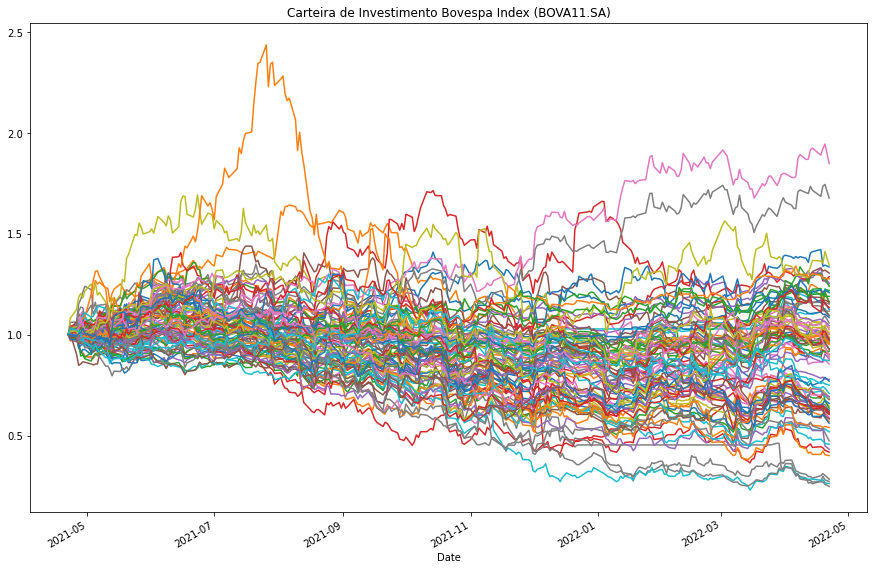

In [11]:
fig = ibov_returns_acum.plot(figsize=(15, 10), title='Carteira de Investimento Bovespa Index (BOVA11.SA)', legend=False)

In [35]:
starting_capital = 10000

In [36]:
portfolio_stock = rd.sample(tickers_ibov, k=5)
portfolio = starting_capital * ibov_returns_acum.loc[:, portfolio_stock]
portfolio['Sum'] = portfolio.sum(axis=1)

In [37]:
# Computes the percentage change of each stock.
portfolio['Return'] = portfolio['Sum'].pct_change()

In [38]:
portfolio.tail()

,BIDI11.SA,ENBR3.SA,ECOR3.SA,VIIA3.SA,USIM5.SA,Sum,Return
Date,,,,,,,
2022-04-14,2618.821293,13047.285464,6666.666667,2699.920823,6299.366163,31332.060410,-0.002232
2022-04-18,2734.474018,13064.798599,6489.832007,2723.673793,6265.236470,31278.014886,-0.001725
2022-04-19,2984.790875,12761.237595,6604.774536,2699.920823,6387.128230,31437.852059,0.005110
2022-04-20,2802.598226,12661.996497,6755.083996,2589.073634,5982.447587,30791.199940,-0.020569
2022-04-22,2726.552598,12451.838879,6595.932803,2486.144101,5821.550463,30082.018845,-0.023032


In [39]:
print(f"Retorno do investimento R${portfolio['Sum'][-1] - starting_capital:.2f}.")

Retorno do investimento R$20082.02.


<AxesSubplot:title={'center':'Retorno do Portfolio Comparado ao Índice IBOVESPA'}, xlabel='Date'>

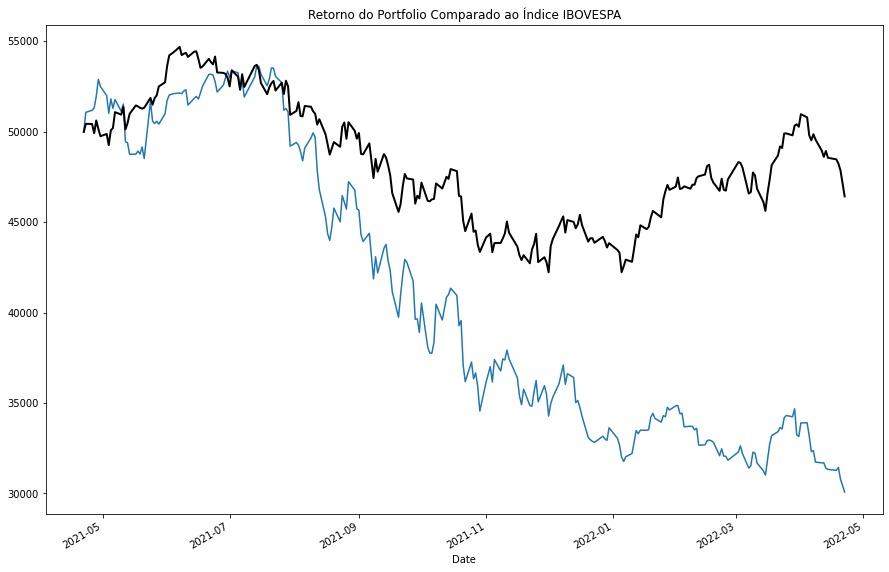

In [40]:
portfolio['Sum'].plot(figsize=(15, 10), title='Retorno do Portfolio Comparado ao Índice IBOVESPA')
(bova11 * 50000).plot(linewidth=2, color='black')

### Comparando 500 carteiras geradas aleatoriamente

<AxesSubplot:title={'center':'Retorno do Portfolio Comparado ao Índice IBOVESPA'}, xlabel='Date'>

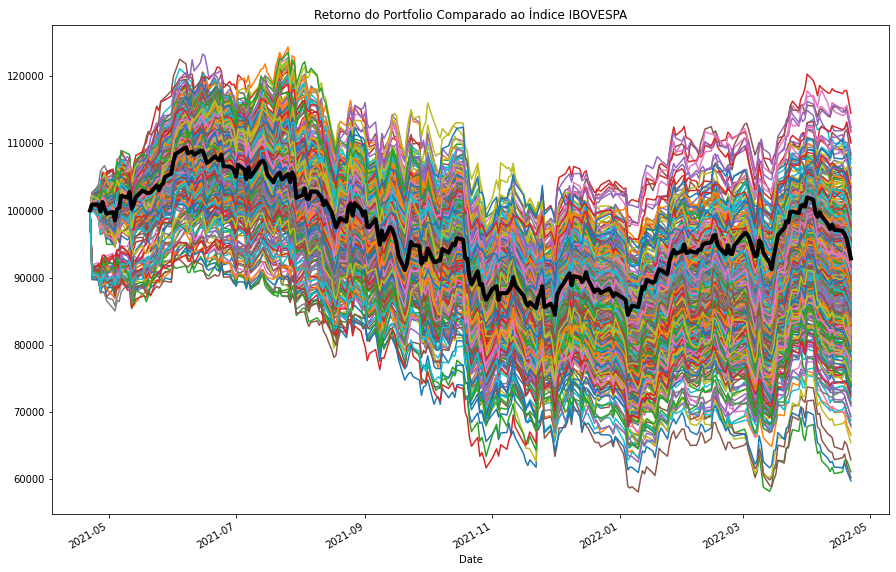

In [42]:
for i in range(501):
    portfolio_stock = rd.sample(tickers_ibov, k=10)
    portfolio = ibov_returns_acum.loc[:, portfolio_stock] * starting_capital
    portfolio['Sum'] = portfolio.sum(axis=1)
    portfolio['Return'] = portfolio['Sum'].pct_change()
    portfolio['Sum'].plot(figsize=(15, 10), title='Retorno do Portfolio Comparado ao Índice IBOVESPA')

(bova11 * (starting_capital * 10)).plot(linewidth=4, color='black')
    